In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from math import log, exp

In [3]:
InputData = {
        "base_prop": {
            "calc_type": "optimal",
            "segment_count": 10,
            "border_type_x": "c",
            "border_type_y": "c",
            "border_type_z_up": "n",
            "border_type_z_down": "n"
        },
        "target": {
            "time_step": 0.01,
            "number_of_steps": 100,
            "cumulative_work_time": 2400,
            "target_values": {
                "q_liq": 50,
                "p_bhp": 150
            }
        },
        "unit": {
            "skin": 0,
            "h_eff": 10,
            "vertical_offset": 0.5,
            "perfres_ratio": 1,
            "wellbore_prop": {
                "wellbore_type": "multilateral",
                "wellbore_r": 0.1,
                "horizontal_wellbore_length": 624,
                "horizontal_wellbore_perf_ratio": 1,
                "horizontal_perf_count": 5,
                "permeability": 100000000
            },
            "layer_prop": {
                "permeability": 10,
                "kv_kh_ratio": 0.1,
                "compressibility": 0.00012,
                "porosity": 0.2,
                "p_res_init": 250,
                "viscosity_oil": 1,
                "b_oil": 1.2,
                "res_model_type": "Homogeneous",
                "f_compressibility": 0.0001,
                "f_porosity": 0.001,
                "lambda": 0.00001,
                "internal_r": 1,
                "kmu_in_out_ratio": 2,
                "kmuphict_in_out_ratio": 2,
                "grp_flag": False,
                "grp_prop": {
                    "hf": 60,
                    "kf": 1400,
                    "wellbore_wf": 4.31,
                    "res_wf": 4.31,
                    "grade": 1,
                    "skin_border": 0,
                    "skin_ch": 0,
                    "fracture_grow_t": 0
                },
                "mgrp_flag": False,
                "mgrp_prop": {
                    "grp_count": 3,
                    "f_direction": "longitudal"
                },
                "multilateral_prop":
                    {
                        "l_lateral": 250,
                        "n_lateral": 3,
                        "psi_lateral": 30
                    },
                "xe": 1000,
                "ye": 1000,
                "lc_ratio": 0.5,
                "wc_rectangle_ratio": 0.5
            }
        }
    }

In [4]:
response_target_rate = requests.post(r"http://192.168.3.247:40000/calc_flow_rate", json=InputData)
response_target_rate.text

'{"result":{"flow_rate_result":[8142.593646674682,7959.008915052271,7782.523976765681,7612.797655407831,7449.505994410409,7292.33401477694,7141.01348679605,6995.232763105396,6854.705059228594,6719.2524491865,6588.594061390134,6462.532528405488,6340.809186496268,6223.254772997262,6109.6735324822275,5999.879125662148,5893.703467435387,5790.987364168048,5691.582803895773,5595.3561783181785,5502.189636537111,5411.980273368014,5324.636435747973,5240.058074654715,5158.144171112744,5078.716672044075,5001.549484231862,4926.290921121259,4852.587138173036,4779.785220342422,4707.236764346579,4634.283494971331,4560.126182700575,4484.053846516247,4405.372188255344,4323.528177817649,4238.100563350551,4148.7139234138,4055.2650788618366,3957.81717012501,3856.2065197144584,3750.884988469378,3642.0938398070734,3530.0713732685026,3415.382609138866,3298.342266163535,3179.223439787997,3058.4782369548557,2936.4628042223176,2813.2542666686754,2689.2264046245587,2564.4730178697982,2439.2506814398575,2313.8491

In [5]:
flow_rate = response_target_rate.json()["result"]["flow_rate_result"]
JD_q = response_target_rate.json()["result"]["JD"]
t = response_target_rate.json()["result"]["t"]

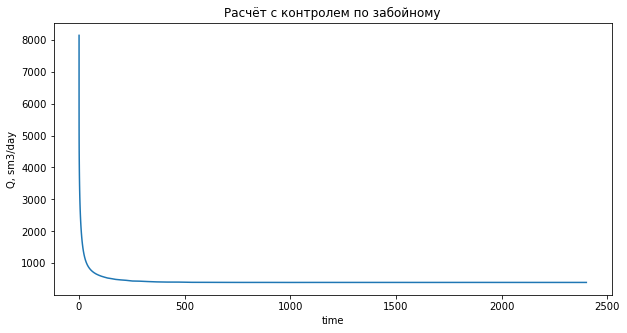

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(t, flow_rate)
plt.title("Расчёт с контролем по забойному")
plt.xlabel("time")
plt.ylabel("Q, sm3/day");

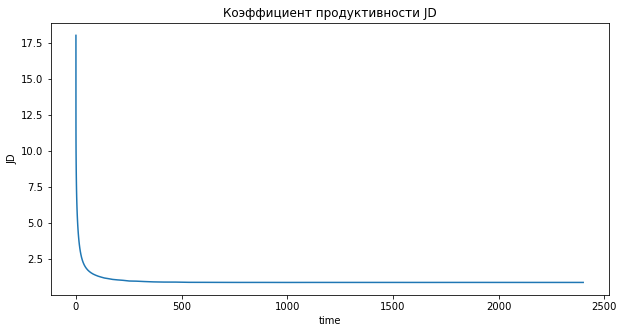

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(t, JD_q)
plt.title("Коэффициент продуктивности JD")
plt.xlabel("time")
plt.ylabel("JD");

In [8]:
response_pbhp = requests.post(r"http://192.168.3.247:40000/calc_p_bhp", json=InputData)
response_pbhp.text

'{"result":{"t":[0.01,0.01133301772727612,0.01284372908067548,0.014555820935562704,0.0164961376697789,0.018695102064319166,0.02118719231081655,0.024011482604969228,0.027212255802029846,0.03083969774035767,0.034950684119531075,0.039609672270707365,0.04488971180155239,0.050873589961930935,0.05765512968887398,0.06534066068324125,0.07405068658351069,0.08392177437678947,0.09510869567166219,0.10778685340650572,0.12215503204232418,0.13843851436116425,0.15689261373928443,0.17780667727859953,0.20150862256264326,0.22837007917014288,0.258812215561468,0.2933123426993725,0.3324113979440877,0.3767224265648983,0.42694019385224685,0.4838520785414217,0.5483504183489329,0.6214465011907734,0.7042864214548755,0.7981690499427965,0.9045663992364851,1.0251467038045414,1.161800576727555,1.3166706531613002,1.4921851853261243,1.691096115767977,1.9165222258526273,2.1719980360306512,2.461529224594429,2.7896554338536905,3.161521448485603,3.5829578620851015,4.06057249670938,4.601854008809726,5.21528930601773,5.9104

In [9]:
pbhp = response_pbhp.json()["result"]["p_wf_result"]
JD_p = response_pbhp.json()["result"]["JD"]
t = response_pbhp.json()["result"]["t"]

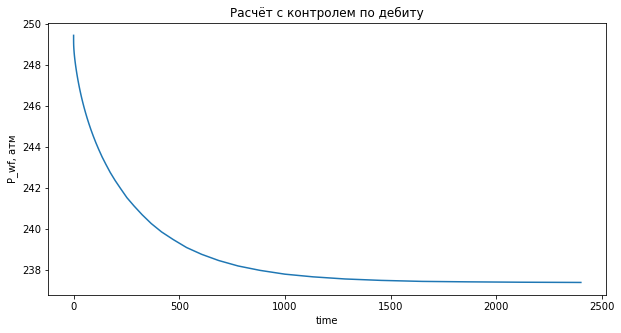

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(t, pbhp)
plt.title("Расчёт с контролем по дебиту")
plt.xlabel("time")
plt.ylabel("P_wf, атм");

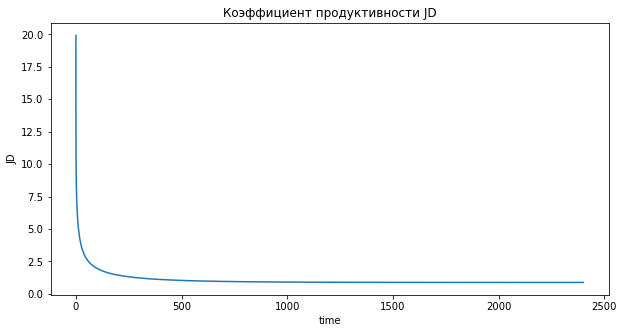

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(t, JD_p)
plt.title("Коэффициент продуктивности JD")
plt.xlabel("time")
plt.ylabel("JD");